In [2]:
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
IMAGE_SHAPE = (2840, 2840)

png_img = np.asarray(Image.open("./mono16_ADC12.png"))
print(png_img.shape)

raw_img = np.fromfile("./mono16_ADC12.raw", dtype=np.uint16, sep="").reshape(IMAGE_SHAPE)
print(raw_img.shape)

(2840, 2840)
(2840, 2840)


In [6]:
_ = np.unique(raw_img.flatten())
_.sort()

print(_)
print(np.diff(_))

[42199 42213 42227 42255 42270 42312 42340 42369 42383 42397 42425 42440
 42454 42468 42482 42496 42511 42521 42535 42550 42564 42578 42592 42607
 42621 42635 42646 42660 42674 42688 42703 42717 42731 42745 42760 42770
 42785 42799 42813 42828 42842 42856 42867 42881 42896 42910 42924 42939
 42953 42967 42981 42996 43010 43025 43039 43053 43064 43078 43093 43107
 43121 43136 43150 43161 43175 43190 43204 43219 43233 43244 43258 43273
 43287 43301 43316 43327 43341 43355 43370 43384 43399 43413 43428 43442
 43457 43471 43482 43496 43511 43525 43540 43551 43565 43580 43594 43609
 43619 43634 43648 43663 43678 43688 43703 43717 43732 43746 43761 43776
 43790 43805 43816 43830 43845 43859 43870 43885 43899 43914 43928 43939
 43954 43969 43983 43994 44009 44023 44038 44053 44067 44082 44096 44107
 44122 44137 44151 44162 44177 44192 44206 44217 44232 44247 44261 44272
 44287 44302 44316 44331 44346 44360 44371 44386 44401 44415 44426 44441
 44456 44467 44482 44496 44511 44522 44537 44552 44

In [7]:
def gaussian(x, A, mu, sigma):
    return A / np.sqrt(2 * np.pi) / sigma * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def quick_display(img, bins):
    plt.imshow(img, cmap="RdBu", vmin=bins[0], vmax=bins[-1])
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.colorbar()
    plt.show()
    
    plt.hist(img.flatten(), bins=bins, alpha=0.8,
             label="Data")
    
    y, x = np.histogram(img.flatten(), bins)
    x = (x[1:] + x[:-1]) / 2
    mu_init, sigma_init = np.mean(img.flatten()), np.std(img.flatten())
    A_init = np.max(y) * np.sqrt(2 * np.pi) * sigma_init
#     A_init = np.sum(y)
    print(A_init, mu_init, sigma_init)
    res, cov = optimize.curve_fit(gaussian, x, y, p0=(A_init, mu_init, sigma_init))
    print(res, cov)
    
    plt.plot(x, gaussian(x, A_init, mu_init, sigma_init), linestyle='--', color='r',
             label=f"Initial Guess\n$\mu = {mu_init:.3e}$, $\sigma = {sigma_init:.0f}$")
    plt.plot(x, gaussian(x, *res), linestyle='--', color='g',
             label=f"LS Fit\n$\mu = {res[1]:.3e}$, $\sigma = {res[2]:.0f}$")
    
    plt.xlabel("Pixel Value [ADU]")
    plt.ylabel("# of Pixels / bin")
    plt.legend()
    plt.show()
    
    print(np.mean(img), np.std(img))

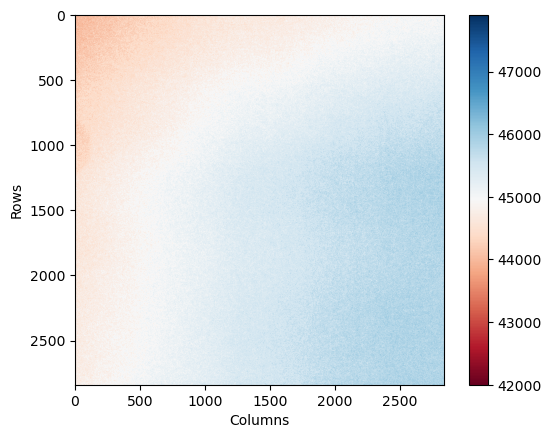

849297787.2025051 45195.810464069626 639.1615122494504
[8.13352826e+08 4.52087643e+04 6.59787611e+02] [[6.62044460e+13 2.06591709e+01 3.58031538e+07]
 [2.06591709e+01 5.80864722e+01 1.96099482e-06]
 [3.58031538e+07 1.96099482e-06 5.80865966e+01]]


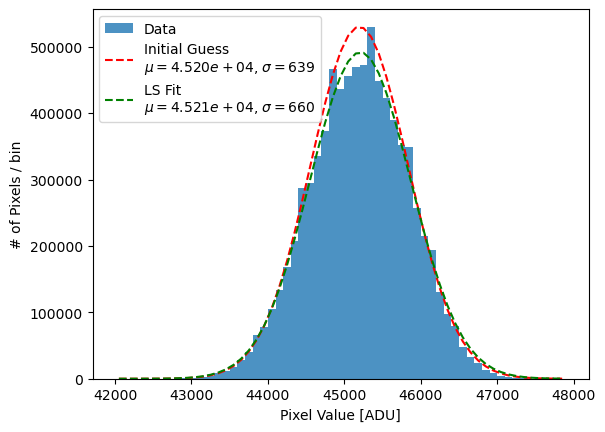

45195.810464069626 639.1615122494504


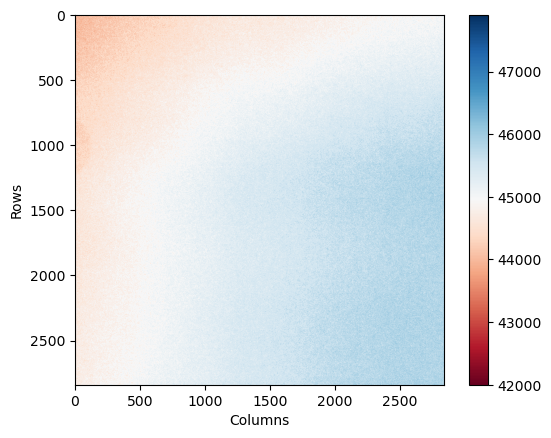

848665793.197144 45193.168434338426 638.7991631008576
[8.13331124e+08 4.52065394e+04 6.59320641e+02] [[6.58052057e+13 1.96049677e+01 3.55630066e+07]
 [1.96049677e+01 5.76575751e+01 5.48499624e-07]
 [3.55630066e+07 5.48499624e-07 5.76576914e+01]]


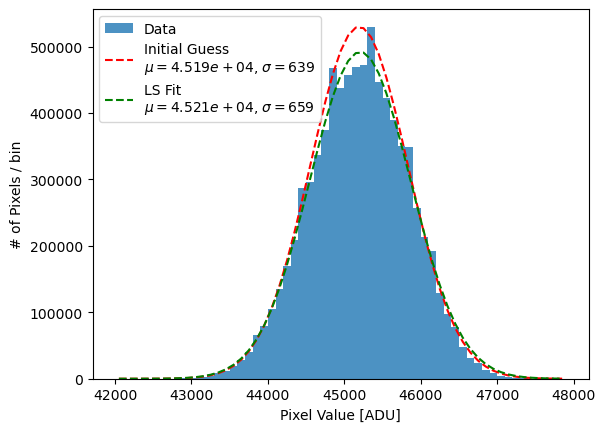

45193.168434338426 638.7991631008576


In [8]:
quick_display(png_img, bins=np.arange(42000, 48000, 100))

quick_display(raw_img, bins=np.arange(42000, 48000, 100))

# quick_display(png_img - raw_img, bins=np.arange(-2400, 2400, 10))

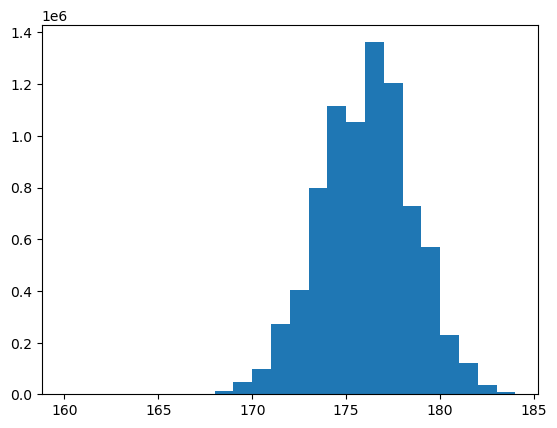

In [7]:
plt.hist(np_img.flatten(), bins=np.arange(160, 185))
plt.show()